In [55]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [56]:
data=pd.read_csv("C:/Users/91932\/Downloads/ADANIPORTS.csv")

In [57]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [140]:
df2=data.reset_index()[['Close']]
df2.head(10)

,Close
0,962.90
1,893.90
2,884.20
3,921.55
4,969.30
5,1041.45
6,1082.45
7,1081.30
8,1102.40
9,1075.40


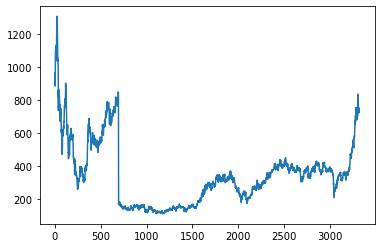

In [141]:
plt.plot(df2)

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler=MinMaxScaler()

In [175]:

df1=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [176]:
df1.shape

(3322, 1)

In [145]:
from sklearn.model_selection import train_test_split

In [189]:
train_data,test_data=train_test_split(df1,test_size=0.5)

In [190]:
len(train_data) , len(test_data)

(1661, 1661)

In [212]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [217]:

n_input=12
n_features =1


generator=TimeseriesGenerator(train_data,train_data,length=n_input,batch_size=1)
train_data.shape

(1661, 1)

In [193]:
x_train=np.array(x_train)
y_train=np.array(y_train)

#x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [194]:
x_train.shape ,y_train.shape  # it will train 60 days and gie on the basis og 60 days 

((1601, 60, 1), (1601,))

In [195]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ,LSTM,Dropout




In [196]:
models=Sequential()
models.add(LSTM(units=50,return_sequences=True,input_shape=(60,1)))
models.add(Dropout(0.2))


models.add(LSTM(units=50,return_sequences=True))
models.add(Dropout(0.3))
          
models.add(LSTM(units=50,return_sequences=True))
models.add(Dropout(0.4))
          
models.add(LSTM(units=50,return_sequences=True))
models.add(Dropout(0.5))

models.add(Dense(units=1))

In [197]:
models.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_57 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_59 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_58 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_60 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_59 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_61 (LSTM)              (None, 60, 50)          

In [198]:
models.compile(optimizer='adam',loss='mean_squared_error')

In [202]:
models.fit(x_train,y_train,epochs=15)

Epoch 1/15
51/51 [==============================] - 15s 111ms/step - loss: 0.0314
Epoch 2/15
51/51 [==============================] - 6s 110ms/step - loss: 0.0276
Epoch 3/15
51/51 [==============================] - 6s 115ms/step - loss: 0.0274
Epoch 4/15
51/51 [==============================] - 6s 124ms/step - loss: 0.0272
Epoch 5/15
51/51 [==============================] - 6s 123ms/step - loss: 0.0268
Epoch 6/15
51/51 [==============================] - 6s 114ms/step - loss: 0.0270
Epoch 7/15
51/51 [==============================] - 7s 140ms/step - loss: 0.0267
Epoch 8/15
51/51 [==============================] - 6s 123ms/step - loss: 0.0266
Epoch 9/15
51/51 [==============================] - 6s 109ms/step - loss: 0.0265
Epoch 10/15
51/51 [==============================] - 6s 120ms/step - loss: 0.0266
Epoch 11/15
51/51 [==============================] - 6s 113ms/step - loss: 0.0264
Epoch 12/15
51/51 [==============================] - 6s 114ms/step - loss: 0.0264
Epoch 13/15
51/51 [=====

In [209]:
x_test=[]
y_test=[]

for i in range(60,test_data.shape[0]):
    x_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])
    
    
 

In [210]:
x_test=np.array(x_test)
y_test=np.array(y_test)
x_test.shape
y_test.shape
#x_test.shape
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_test.shape

(1601, 60, 1)

In [211]:
y_pred=models.predict(x_test)
y_pred
#y_pred=y_predsss.reshape(-1,)
y_pred.shape

(1601, 60, 1)

In [30]:
scaler.scale_
scale=1/0.00083372

In [31]:

y_preds=y_pred*scale
y_tests=y_test*scale

In [32]:
#normal_value
y_tests.shape
y_preds.shape

(56220,)

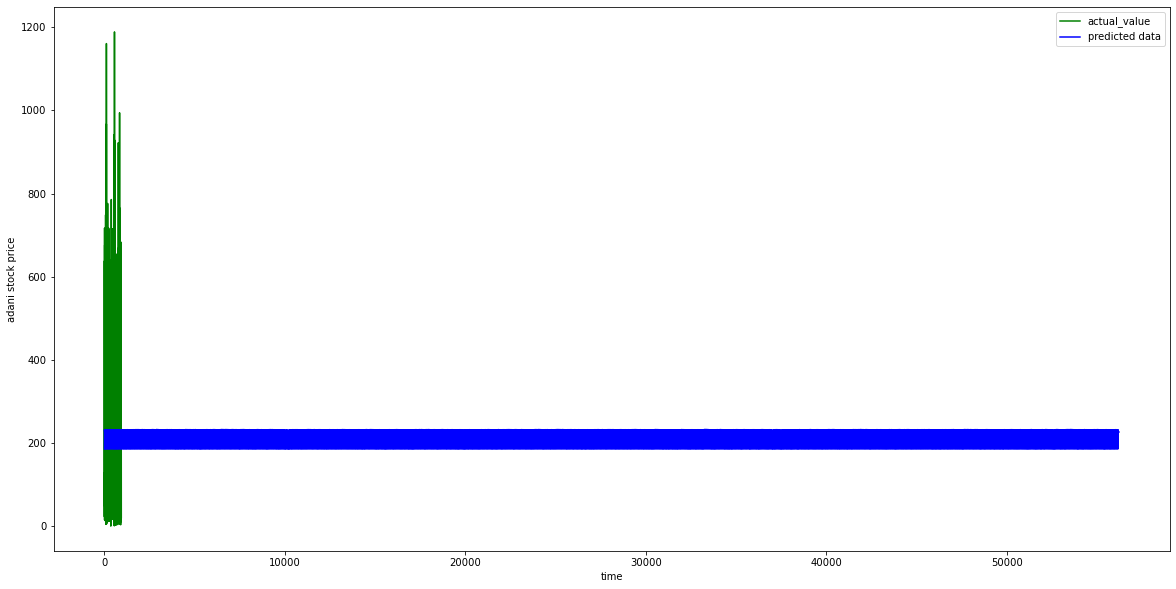

In [34]:
plt.figure(figsize=(20,10))
plt.plot(y_tests,color="green",label="actual_value")
plt.plot(y_preds,color='blue',label="predicted data")
plt.xlabel('time')
plt.ylabel('adani stock price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

In [ ]:
vv=[0.33,0.44,0.65,0.67,0.677,0.777,0.6767,0.554,0.554,0.4545,0.4646,0.777,0.444,0.44,0.77,0.33,0.111,0.455,0.433,0.989]


vv=np.array(vv)
vv=vv.reshape(-1,1)

In [ ]:
bh=[]



In [ ]:


for i in range(20,vv.shape[0]):
    bh.append(vv[i-20:i])

    
    
bh=np.array(bh)

#model.predict(vv)    

In [ ]:
bh.shape

In [ ]:
model.predict([0.555])

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
dataset=tf.data.Dataset.range(10)
dataset=dataset.window(5,shift=1,drop_remainder=True)

In [6]:
print(dataset)

<WindowDataset shapes: DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([])), types: DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([]))>


In [8]:
dataset=dataset.flat_map(lambda window: window.batch(5))

In [10]:
for x in dataset:
    print(x.numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 1, 2, 3, 4], dtype=int64)>>
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 2, 3, 4, 5], dtype=int64)>>
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 3, 4, 5, 6], dtype=int64)>>
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(5,), dtype=int64, numpy=array([3, 4, 5, 6, 7], dtype=int64)>>
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(5,), dtype=int64, numpy=array([4, 5, 6, 7, 8], dtype=int64)>>
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(5,), dtype=int64, numpy=array([5, 6, 7, 8, 9], dtype=int64)>>


In [12]:
dataset=dataset.map(lambda window:(window[:-1],window[-1]))

In [15]:
for x,y in dataset:
    print(x,y)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int64) tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor([1 2 3 4], shape=(4,), dtype=int64) tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor([2 3 4 5], shape=(4,), dtype=int64) tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor([3 4 5 6], shape=(4,), dtype=int64) tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64) tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor([5 6 7 8], shape=(4,), dtype=int64) tf.Tensor(9, shape=(), dtype=int64)


In [17]:
dataset=dataset.shuffle(buffer_size=10)
for x,y in dataset:
    print(x,y)

tf.Tensor([1 2 3 4], shape=(4,), dtype=int64) tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int64) tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor([2 3 4 5], shape=(4,), dtype=int64) tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor([3 4 5 6], shape=(4,), dtype=int64) tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor([5 6 7 8], shape=(4,), dtype=int64) tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64) tf.Tensor(8, shape=(), dtype=int64)


In [19]:
dataset=dataset.batch(2).prefetch(1)

for x , y in dataset:
    print('x =',x.numpy())
    print('y =',y.numpy())

x = [[5 6 7 8]
 [1 2 3 4]]
y = [9 5]
x = [[0 1 2 3]
 [2 3 4 5]]
y = [4 6]
x = [[4 5 6 7]
 [3 4 5 6]]
y = [8 7]


In [22]:
def windowed_dataset(series,window_size,batch_size,shuffle_buffer):
    dataset=tf.Data.Dataset.from_tensor_slices(series)
    dataset=dataset.flat_map(lambda window:window.batch(window_size+1))
    dataset=dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1],window[-1]))
    dataset=dataset.batch(batch_size).prefetch(1)
    return dataset

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)


split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

NameError: name 'trend' is not defined

In [25]:
dataset=windowed_dataset(series,window_size,batch_size,shuffle_buffer_size)
l0=tf.keras.layers.Dense(1,input_shape=[window_size])
model=tf.keras.models.Sequential([l0])

NameError: name 'series' is not defined

In [31]:
import pandas as pd

In [32]:
datas=pd.read_csv("C:/Users/91932/anaconda3/pkgs/statsmodels-0.12.2-py38h2bbff1b_0/Lib/site-packages/statsmodels/datasets/sunspots/sunspots.csv")

In [34]:
data=pd.read_csv("C:/Users/91932/Downloads/Sunspots.csv")

In [35]:
data.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [ ]:
data['']